Importing all the modules

In [27]:
# importing all the libraries

import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

Loading the data

In [28]:
# load a sample of data (10% of data from dataset)
data = pd.read_csv(r'Dataset-SA.csv').sample(frac=0.1, random_state=42)

In [29]:
data.head()

,product_name,product_price,Rate,Review,Summary,Sentiment
193551,BAJAJ 17 L Solo Microwave Oven1701MT White,4498,1,worst experience ever!,not working properly,neutral
149083,ScotchBrite Sponge WipeLarge Pack of 3,189,5,just wow!,very good,positive
194975,limraz furniture Engineered Wood Computer Desk...,1298,5,classy product,it is perfect if you want to work on the compu...,positive
29981,Lakm?? Eyeconic Kajal Twin Pack??????(Deep Bla...,218,5,simply awesome,thanks flipkart,positive
137259,KENT Aura Portable Room Air PurifierPink,6999,5,simply awesome,thanks product looks good not sure if any inst...,positive


Visualize the sentiment distribution

The next step now is to count the frequency of each category of sentiment in the data

this will return both the index of each category and the values

so we can ues the two to make a bar plot

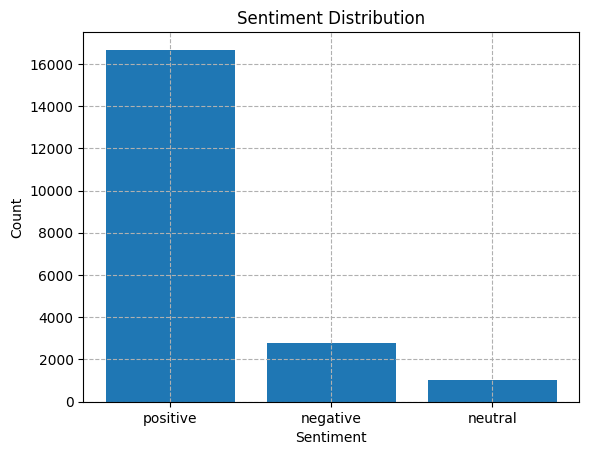

In [30]:
# visualize the distribution of sentiments
sentiment_counts = data['Sentiment'].value_counts()
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.grid(linestyle='--')
plt.show()


Visualize the customer review summary using WordCloud 1

we have to create a text variable which is basically the text data to be visualized

then we have to set the parameters of the wordcloud

the matplotlib imshow function is then called to visualize the texts

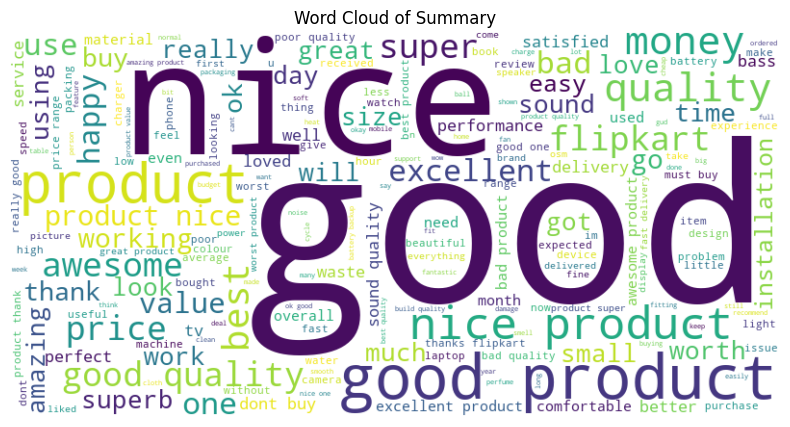

In [31]:
# Generate a word cloud of the 'summary' column
text = ' '.join(data['Summary'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

#Display the word cloud
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Summary')
plt.show()


Feature extraction and split the data (train and test set)

the next step is to select the features for our model such as the predictior(s) and target variable

in this case "summary" column is the predictor and "sentiment" column is the target variable

then we proceed to split the data into both the training and testing sets (80:20)

In [32]:
# Extract features from the text data
data = data.dropna()
x = data['Summary']
y = data['Sentiment']

# train a machine learning model
# split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Vectorization of the text data

we now have to convert the data into the format that the algorithm understood

this is called vectorization 

both the train and test sets have to be vectorized

this is a crucial step in machine learning model that use the text data

In [33]:
# vectorize the text data
vectorizer = CountVectorizer()
x_train_counts = vectorizer.fit_transform(x_train)
x_test_counts = vectorizer.transform(x_test)


Training - Multinomial Naive Bayes Classifier

after we get our data ready for training then we proceed to initiating the model

then supply the training data to the model for it to learn

In [34]:
#Train Multinomial Naive Bayes Classifier
'''nb_classifier = MultinomialNB()
nb_classifier.fit(x_train_counts, y_train)'''

'nb_classifier = MultinomialNB()\nnb_classifier.fit(x_train_counts, y_train)'

Make Predictions and check the accuracy of the model

In [35]:
# make predictions using multinomial Naive Bayes
'''y_pred_nb = nb_classifier.predict(x_test_counts)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Multinomial Naive Bayes Accuracy:",accuracy_nb)
print("Multinomial Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb))'''

'y_pred_nb = nb_classifier.predict(x_test_counts)\naccuracy_nb = accuracy_score(y_test, y_pred_nb)\nprint("Multinomial Naive Bayes Accuracy:",accuracy_nb)\nprint("Multinomial Naive Bayes Classification Report:")\nprint(classification_report(y_test, y_pred_nb))'

Training - Random Forest

In [36]:
# Train Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(x_train_counts, y_train)


RandomForestClassifier(random_state=42)

In [37]:
# Make predictions using Random Forest Classifier
y_pred_rf = rf_classifier.predict(x_test_counts)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("\n Random Forest Accuracy:",accuracy_rf)
print("Random Forest Classifier Classification Report:")
print(classification_report(y_test, y_pred_rf))


 Random Forest Accuracy: 0.9274238227146815
Random Forest Classifier Classification Report:
              precision    recall  f1-score   support

    negative       0.85      0.78      0.82       464
     neutral       0.67      0.34      0.45       172
    positive       0.95      0.98      0.96      2974

    accuracy                           0.93      3610
   macro avg       0.82      0.70      0.74      3610
weighted avg       0.92      0.93      0.92      3610



Prediction on New Data

to make prediction on new data lets write short function for each model

the function takes the customer reviews as text then

vectorize the input

then pass it to the already trained model to return th class of the sentiment

In [38]:
# Make prediction on new Data
# Naive Bayes
'''def predict_sentiment_mt(text):
    text_counts = vectorizer.transform([text])
    prediction = nb_classifier.predict(text_counts)[0]
    return prediction'''


# Random Forest
def predict_sentiment_rf(text):
    text_counts = vectorizer.transform([text])
    prediction = rf_classifier.predict(text_counts)[0]
    return prediction


In [ ]:
input_text = "really good product"
predicted_sentiment = predict_sentiment_rf(input_text)
print("Predicted Sentiment :", predicted_sentiment)

Predicted Sentiment : negative
